In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import curve_fit

from mpl_toolkits.mplot3d import Axes3D

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

In [119]:
fajli = !ls tht*.dat
prebrano = np.loadtxt(fajli[0])
data = pd.DataFrame(data=prebrano, columns=["y", "x1", "x2"])
data.describe()

,y,x1,x2
count,11665.000000,11665.000000,11665.000000
mean,-0.921421,-5.961066,-13.716345
std,42.613721,64.203835,87.895139
min,-71.810000,-89.816000,-199.898000
25%,-40.001000,-71.916000,-81.898000
50%,0.000000,-23.116000,-17.898000
75%,30.777000,51.384000,56.102000
max,71.810000,93.384000,164.102000


/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.


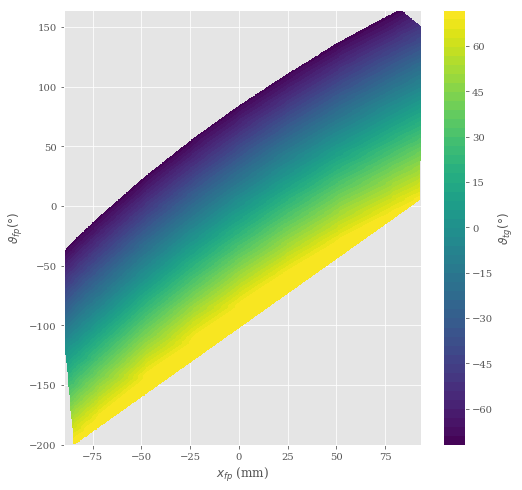

In [121]:
fajli = !ls tht*.dat
prebrano = np.loadtxt(fajli[0])
data = pd.DataFrame(data=prebrano, columns=["y", "x1", "x2"])
#data = data.sample(1000)
data["x1_err"] = 1 
data["x2_err"] = 0.028647889


from matplotlib.mlab import griddata
import matplotlib.colors


x = data.x1
y = data.x2
z = data.y
# define grid.
xi = np.linspace(data.x1.min(),data.x1.max(), 500)
yi = np.linspace(data.x2.min(),data.x2.max(), 500)
# grid the data.
zi = griddata(x, y, z, xi, yi, interp='linear',)
plt.figure(figsize=(8,8))
plt.ylabel(r"$\vartheta_{fp} (°)$")
plt.xlabel(r"$x_{fp}$ (mm)")

#plt.imshow(zi, interpolation="nearest", )


plt.contourf(xi, yi, zi, 50)

#cs = plt.imshow(zi, extent=[xi.min(), xi.max(), yi.min(), yi.max()], aspect="equal")


cb = plt.colorbar()
#norm= matplotlib.colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())
#sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
#sm.set_array([])
#cb = plt.colorbar(sm, ticks=cs.levels)
cb.set_label(r"$\vartheta_{tg} (°)$")

plt.savefig("2-1-contour-numpy.pdf")
plt.savefig("2-1-contour-numpy.jpg")
plt.show()

In [163]:
x1,x2,x1_err,x2_err,y = data.x1,data.x2,data.x1_err,data.x2_err, data.y
slike = False
def oceni(koef):
    
    fiji=[lambda x1,x2: (x1**0)*(x2**0),    #fi0,0
lambda x1,x2: (x1**1)*(x2**0),    #fi1,0
lambda x1,x2: (x1**0)*(x2**1),    #fi0,1
lambda x1,x2: (x1**1)*(x2**1),    #fi1,1
lambda x1,x2: (x1**2)*(x2**0),    #fi2,0
lambda x1,x2: (x1**0)*(x2**2),    #fi0,2
lambda x1,x2: (x1**2)*(x2**1),    #fi2,1
lambda x1,x2: (x1**1)*(x2**2),    #fi1,2
lambda x1,x2: (x1**2)*(x2**2),    #fi2,2
lambda x1,x2: (x1**3)*(x2**0),    #fi3,0
lambda x1,x2: (x1**0)*(x2**3),    #fi0,3
lambda x1,x2: (x1**3)*(x2**1),    #fi3,1
lambda x1,x2: (x1**1)*(x2**3),    #fi1,3
lambda x1,x2: (x1**3)*(x2**2),    #fi3,2
lambda x1,x2: (x1**2)*(x2**3),    #fi2,3
lambda x1,x2: (x1**3)*(x2**3),    #fi3,3
lambda x1,x2: (x1**4)*(x2**0),    #fi4,0
lambda x1,x2: (x1**0)*(x2**4),    #fi0,4
lambda x1,x2: (x1**4)*(x2**1),    #fi4,1
lambda x1,x2: (x1**1)*(x2**4),    #fi1,4
lambda x1,x2: (x1**4)*(x2**2),    #fi4,2
lambda x1,x2: (x1**2)*(x2**4),    #fi2,4
lambda x1,x2: (x1**4)*(x2**3),    #fi4,3
lambda x1,x2: (x1**3)*(x2**4),    #fi3,4
lambda x1,x2: (x1**4)*(x2**4),    #fi4,4
lambda x1,x2: (x1**5)*(x2**0),    #fi5,0
lambda x1,x2: (x1**0)*(x2**5),    #fi0,5
lambda x1,x2: (x1**5)*(x2**1),    #fi5,1
lambda x1,x2: (x1**1)*(x2**5),    #fi1,5
lambda x1,x2: (x1**5)*(x2**2),    #fi5,2
lambda x1,x2: (x1**2)*(x2**5),    #fi2,5
lambda x1,x2: (x1**5)*(x2**3),    #fi5,3
lambda x1,x2: (x1**3)*(x2**5),    #fi3,5
lambda x1,x2: (x1**5)*(x2**4),    #fi5,4
lambda x1,x2: (x1**4)*(x2**5),    #fi4,5
lambda x1,x2: (x1**5)*(x2**5),    #fi5,5
lambda x1,x2: (x1**6)*(x2**0),    #fi6,0
lambda x1,x2: (x1**0)*(x2**6),    #fi0,6
lambda x1,x2: (x1**6)*(x2**1),    #fi6,1
lambda x1,x2: (x1**1)*(x2**6),    #fi1,6
lambda x1,x2: (x1**6)*(x2**2),    #fi6,2
lambda x1,x2: (x1**2)*(x2**6),    #fi2,6
lambda x1,x2: (x1**6)*(x2**3),    #fi6,3
lambda x1,x2: (x1**3)*(x2**6),    #fi3,6
lambda x1,x2: (x1**6)*(x2**4),    #fi6,4
lambda x1,x2: (x1**4)*(x2**6),    #fi4,6
lambda x1,x2: (x1**6)*(x2**5),    #fi6,5
lambda x1,x2: (x1**5)*(x2**6),    #fi5,6
lambda x1,x2: (x1**6)*(x2**6),    #fi6,6
lambda x1,x2: (x1**7)*(x2**0),    #fi7,0
lambda x1,x2: (x1**0)*(x2**7),    #fi0,7
lambda x1,x2: (x1**7)*(x2**1),    #fi7,1
lambda x1,x2: (x1**1)*(x2**7),    #fi1,7
lambda x1,x2: (x1**7)*(x2**2),    #fi7,2
lambda x1,x2: (x1**2)*(x2**7),    #fi2,7
lambda x1,x2: (x1**7)*(x2**3),    #fi7,3
lambda x1,x2: (x1**3)*(x2**7),    #fi3,7
lambda x1,x2: (x1**7)*(x2**4),    #fi7,4
lambda x1,x2: (x1**4)*(x2**7),    #fi4,7
lambda x1,x2: (x1**7)*(x2**5),    #fi7,5
lambda x1,x2: (x1**5)*(x2**7),    #fi5,7
lambda x1,x2: (x1**7)*(x2**6),    #fi7,6
lambda x1,x2: (x1**6)*(x2**7),    #fi6,7
lambda x1,x2: (x1**7)*(x2**7),    #fi7,7
lambda x1,x2: (x1**8)*(x2**0),    #fi8,0
lambda x1,x2: (x1**0)*(x2**8),    #fi0,8
lambda x1,x2: (x1**8)*(x2**1),    #fi8,1
lambda x1,x2: (x1**1)*(x2**8),    #fi1,8
lambda x1,x2: (x1**8)*(x2**2),    #fi8,2
lambda x1,x2: (x1**2)*(x2**8),    #fi2,8
lambda x1,x2: (x1**8)*(x2**3),    #fi8,3
lambda x1,x2: (x1**3)*(x2**8),    #fi3,8
lambda x1,x2: (x1**8)*(x2**4),    #fi8,4
lambda x1,x2: (x1**4)*(x2**8),    #fi4,8
lambda x1,x2: (x1**8)*(x2**5),    #fi8,5
lambda x1,x2: (x1**5)*(x2**8),    #fi5,8
lambda x1,x2: (x1**8)*(x2**6),    #fi8,6
lambda x1,x2: (x1**6)*(x2**8),    #fi6,8
lambda x1,x2: (x1**8)*(x2**7),    #fi8,7
lambda x1,x2: (x1**7)*(x2**8),    #fi7,8
lambda x1,x2: (x1**8)*(x2**8),    #fi8,8
lambda x1,x2: (x1**9)*(x2**0),    #fi9,0
lambda x1,x2: (x1**0)*(x2**9),    #fi0,9
lambda x1,x2: (x1**9)*(x2**1),    #fi9,1
lambda x1,x2: (x1**1)*(x2**9),    #fi1,9
lambda x1,x2: (x1**9)*(x2**2),    #fi9,2
lambda x1,x2: (x1**2)*(x2**9),    #fi2,9
lambda x1,x2: (x1**9)*(x2**3),    #fi9,3
lambda x1,x2: (x1**3)*(x2**9),    #fi3,9
lambda x1,x2: (x1**9)*(x2**4),    #fi9,4
lambda x1,x2: (x1**4)*(x2**9),    #fi4,9
lambda x1,x2: (x1**9)*(x2**5),    #fi9,5
lambda x1,x2: (x1**5)*(x2**9),    #fi5,9
lambda x1,x2: (x1**9)*(x2**6),    #fi9,6
lambda x1,x2: (x1**6)*(x2**9),    #fi6,9
lambda x1,x2: (x1**9)*(x2**7),    #fi9,7
lambda x1,x2: (x1**7)*(x2**9),    #fi7,9
lambda x1,x2: (x1**9)*(x2**8),    #fi9,8
lambda x1,x2: (x1**8)*(x2**9),    #fi8,9
lambda x1,x2: (x1**9)*(x2**9),    #fi9,9
lambda x1,x2: (x1**10)*(x2**0),    #fi10,0
lambda x1,x2: (x1**0)*(x2**10),    #fi0,10
lambda x1,x2: (x1**10)*(x2**1),    #fi10,1
lambda x1,x2: (x1**1)*(x2**10),    #fi1,10
lambda x1,x2: (x1**10)*(x2**2),    #fi10,2
lambda x1,x2: (x1**2)*(x2**10),    #fi2,10
lambda x1,x2: (x1**10)*(x2**3),    #fi10,3
lambda x1,x2: (x1**3)*(x2**10),    #fi3,10
lambda x1,x2: (x1**10)*(x2**4),    #fi10,4
lambda x1,x2: (x1**4)*(x2**10),    #fi4,10
lambda x1,x2: (x1**10)*(x2**5),    #fi10,5
lambda x1,x2: (x1**5)*(x2**10),    #fi5,10
lambda x1,x2: (x1**10)*(x2**6),    #fi10,6
lambda x1,x2: (x1**6)*(x2**10),    #fi6,10
lambda x1,x2: (x1**10)*(x2**7),    #fi10,7
lambda x1,x2: (x1**7)*(x2**10),    #fi7,10
lambda x1,x2: (x1**10)*(x2**8),    #fi10,8
lambda x1,x2: (x1**8)*(x2**10),    #fi8,10
lambda x1,x2: (x1**10)*(x2**9),    #fi10,9
lambda x1,x2: (x1**9)*(x2**10),    #fi9,10
lambda x1,x2: (x1**10)*(x2**10),    #fi10,10
          
    ]
    fiji = fiji[:koef**2]
    M = len(fiji) # število baznih funkcij
    A = np.zeros((M,M))
    for j in range(M):
        for k in range(M):
            A[j,k] = np.sum(fiji[j](x1,x2)*fiji[k](x1,x2)/(x1_err*x2_err))


    b = np.zeros(M)
    for j in range(M):
        b[j] = np.sum(y * fiji[j](x1,x2)/(x1_err*x2_err))

    from numpy.linalg import inv
    a = np.dot(inv(A), b)
    def fitano(x,y, a):
        vsota = 0
        for i in range(len(a)):
            vsota += a[i] * fiji[i](x,y)
        return vsota
    moj_fit = fitano(x1,x2,a)
    
    def hi2(y, fitano, x1,x2,a):
        return np.sum((y-fitano(x1,x2,a))**2/x1_err/x2_err)

    hi_kvadrat = hi2(y, fitano, x1, x2, a)
    inverzA = inv(A)
    
    if slike:
        #print("Inverz od A:")
        #print(inverzA)
        a = a.reshape((koef, koef))
        #print("parametri a:")
        #print(a)

        plt.figure(figsize=(8,8))
        plt.subplot(221)
        xi = np.linspace(x1.min(),x1.max(), 500)
        yi = np.linspace(x2.min(),x2.max(), 500)
        zi2 = griddata(x1, x2, moj_fit, xi, yi, interp='linear',)
        zi = griddata(x1,x2, y, xi, yi, interp='linear',)

        plt.ylabel(r"$\vartheta_{fp} (°)$")
        plt.xlabel(r"$x_{fp}$ (mm)")
        plt.contourf(xi, yi, zi2-zi, 50)
        plt.title("Razlika med fitom in podatki")
        cb = plt.colorbar()
        cb.set_label(r"$\vartheta_{tg} (°)$")

        plt.subplot(222)
        plt.title("Vrednosti koeficientov ")      
        plt.imshow(a)
        plt.xlabel(r"Potenca $x_{fp}$")
        plt.ylabel(r"Potenca $\vartheta_{fp}$")
        plt.colorbar()
        
        plt.subplot(223)
        plt.title(r"$A^{-1}$")
        plt.imshow(inverzA)
        plt.colorbar()
        

        plt.tight_layout()
        plt.savefig("2-7-fit.pdf")
        plt.savefig("2-7-fit.jpg")
        plt.show()
    
    return a, inverzA, hi_kvadrat


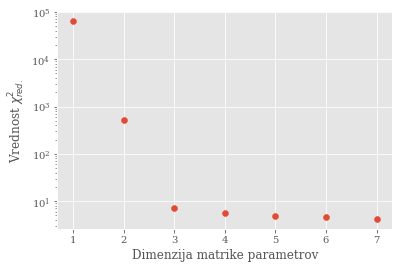

In [150]:
razpon = np.arange(1, 8, step=1)
slike = 0
hikv = [oceni(n) for n in razpon]


hikv = np.array(hikv)/(len(data)-razpon**2)

plt.scatter(razpon, hikv)
plt.semilogy()
plt.ylabel(r"Vrednost $\chi_{red.}^2$")
plt.xlabel("Dimenzija matrike parametrov")
plt.savefig("2-6-hikvadrat.pdf")

plt.show()

In [158]:
x1,x2,x1_err,x2_err,y = data.x1,data.x2,data.x1_err,data.x2_err, data.y
slike = False
def oceni(koef):
    
    fiji=[lambda x1,x2: (x1**0)*(x2**0),    #fi0,0
lambda x1,x2: (x1**1)*(x2**0),    #fi1,0
lambda x1,x2: (x1**0)*(x2**1),    #fi0,1
lambda x1,x2: (x1**1)*(x2**1),    #fi1,1
lambda x1,x2: (x1**2)*(x2**0),    #fi2,0
lambda x1,x2: (x1**0)*(x2**2),    #fi0,2
lambda x1,x2: (x1**2)*(x2**1),    #fi2,1
lambda x1,x2: (x1**1)*(x2**2),    #fi1,2
lambda x1,x2: (x1**2)*(x2**2),    #fi2,2
lambda x1,x2: (x1**3)*(x2**0),    #fi3,0
lambda x1,x2: (x1**0)*(x2**3),    #fi0,3
lambda x1,x2: (x1**3)*(x2**1),    #fi3,1
lambda x1,x2: (x1**1)*(x2**3),    #fi1,3
lambda x1,x2: (x1**3)*(x2**2),    #fi3,2
lambda x1,x2: (x1**2)*(x2**3),    #fi2,3
lambda x1,x2: (x1**3)*(x2**3),    #fi3,3
lambda x1,x2: (x1**4)*(x2**0),    #fi4,0
lambda x1,x2: (x1**0)*(x2**4),    #fi0,4
lambda x1,x2: (x1**4)*(x2**1),    #fi4,1
lambda x1,x2: (x1**1)*(x2**4),    #fi1,4
lambda x1,x2: (x1**4)*(x2**2),    #fi4,2
lambda x1,x2: (x1**2)*(x2**4),    #fi2,4
lambda x1,x2: (x1**4)*(x2**3),    #fi4,3
lambda x1,x2: (x1**3)*(x2**4),    #fi3,4
lambda x1,x2: (x1**4)*(x2**4),    #fi4,4
lambda x1,x2: (x1**5)*(x2**0),    #fi5,0
lambda x1,x2: (x1**0)*(x2**5),    #fi0,5
lambda x1,x2: (x1**5)*(x2**1),    #fi5,1
lambda x1,x2: (x1**1)*(x2**5),    #fi1,5
lambda x1,x2: (x1**5)*(x2**2),    #fi5,2
lambda x1,x2: (x1**2)*(x2**5),    #fi2,5
lambda x1,x2: (x1**5)*(x2**3),    #fi5,3
lambda x1,x2: (x1**3)*(x2**5),    #fi3,5
lambda x1,x2: (x1**5)*(x2**4),    #fi5,4
lambda x1,x2: (x1**4)*(x2**5),    #fi4,5
lambda x1,x2: (x1**5)*(x2**5),    #fi5,5
lambda x1,x2: (x1**6)*(x2**0),    #fi6,0
lambda x1,x2: (x1**0)*(x2**6),    #fi0,6
lambda x1,x2: (x1**6)*(x2**1),    #fi6,1
lambda x1,x2: (x1**1)*(x2**6),    #fi1,6
lambda x1,x2: (x1**6)*(x2**2),    #fi6,2
lambda x1,x2: (x1**2)*(x2**6),    #fi2,6
lambda x1,x2: (x1**6)*(x2**3),    #fi6,3
lambda x1,x2: (x1**3)*(x2**6),    #fi3,6
lambda x1,x2: (x1**6)*(x2**4),    #fi6,4
lambda x1,x2: (x1**4)*(x2**6),    #fi4,6
lambda x1,x2: (x1**6)*(x2**5),    #fi6,5
lambda x1,x2: (x1**5)*(x2**6),    #fi5,6
lambda x1,x2: (x1**6)*(x2**6),    #fi6,6
lambda x1,x2: (x1**7)*(x2**0),    #fi7,0
lambda x1,x2: (x1**0)*(x2**7),    #fi0,7
lambda x1,x2: (x1**7)*(x2**1),    #fi7,1
lambda x1,x2: (x1**1)*(x2**7),    #fi1,7
lambda x1,x2: (x1**7)*(x2**2),    #fi7,2
lambda x1,x2: (x1**2)*(x2**7),    #fi2,7
lambda x1,x2: (x1**7)*(x2**3),    #fi7,3
lambda x1,x2: (x1**3)*(x2**7),    #fi3,7
lambda x1,x2: (x1**7)*(x2**4),    #fi7,4
lambda x1,x2: (x1**4)*(x2**7),    #fi4,7
lambda x1,x2: (x1**7)*(x2**5),    #fi7,5
lambda x1,x2: (x1**5)*(x2**7),    #fi5,7
lambda x1,x2: (x1**7)*(x2**6),    #fi7,6
lambda x1,x2: (x1**6)*(x2**7),    #fi6,7
lambda x1,x2: (x1**7)*(x2**7),    #fi7,7
lambda x1,x2: (x1**8)*(x2**0),    #fi8,0
lambda x1,x2: (x1**0)*(x2**8),    #fi0,8
lambda x1,x2: (x1**8)*(x2**1),    #fi8,1
lambda x1,x2: (x1**1)*(x2**8),    #fi1,8
lambda x1,x2: (x1**8)*(x2**2),    #fi8,2
lambda x1,x2: (x1**2)*(x2**8),    #fi2,8
lambda x1,x2: (x1**8)*(x2**3),    #fi8,3
lambda x1,x2: (x1**3)*(x2**8),    #fi3,8
lambda x1,x2: (x1**8)*(x2**4),    #fi8,4
lambda x1,x2: (x1**4)*(x2**8),    #fi4,8
lambda x1,x2: (x1**8)*(x2**5),    #fi8,5
lambda x1,x2: (x1**5)*(x2**8),    #fi5,8
lambda x1,x2: (x1**8)*(x2**6),    #fi8,6
lambda x1,x2: (x1**6)*(x2**8),    #fi6,8
lambda x1,x2: (x1**8)*(x2**7),    #fi8,7
lambda x1,x2: (x1**7)*(x2**8),    #fi7,8
lambda x1,x2: (x1**8)*(x2**8),    #fi8,8
lambda x1,x2: (x1**9)*(x2**0),    #fi9,0
lambda x1,x2: (x1**0)*(x2**9),    #fi0,9
lambda x1,x2: (x1**9)*(x2**1),    #fi9,1
lambda x1,x2: (x1**1)*(x2**9),    #fi1,9
lambda x1,x2: (x1**9)*(x2**2),    #fi9,2
lambda x1,x2: (x1**2)*(x2**9),    #fi2,9
lambda x1,x2: (x1**9)*(x2**3),    #fi9,3
lambda x1,x2: (x1**3)*(x2**9),    #fi3,9
lambda x1,x2: (x1**9)*(x2**4),    #fi9,4
lambda x1,x2: (x1**4)*(x2**9),    #fi4,9
lambda x1,x2: (x1**9)*(x2**5),    #fi9,5
lambda x1,x2: (x1**5)*(x2**9),    #fi5,9
lambda x1,x2: (x1**9)*(x2**6),    #fi9,6
lambda x1,x2: (x1**6)*(x2**9),    #fi6,9
lambda x1,x2: (x1**9)*(x2**7),    #fi9,7
lambda x1,x2: (x1**7)*(x2**9),    #fi7,9
lambda x1,x2: (x1**9)*(x2**8),    #fi9,8
lambda x1,x2: (x1**8)*(x2**9),    #fi8,9
lambda x1,x2: (x1**9)*(x2**9),    #fi9,9
lambda x1,x2: (x1**10)*(x2**0),    #fi10,0
lambda x1,x2: (x1**0)*(x2**10),    #fi0,10
lambda x1,x2: (x1**10)*(x2**1),    #fi10,1
lambda x1,x2: (x1**1)*(x2**10),    #fi1,10
lambda x1,x2: (x1**10)*(x2**2),    #fi10,2
lambda x1,x2: (x1**2)*(x2**10),    #fi2,10
lambda x1,x2: (x1**10)*(x2**3),    #fi10,3
lambda x1,x2: (x1**3)*(x2**10),    #fi3,10
lambda x1,x2: (x1**10)*(x2**4),    #fi10,4
lambda x1,x2: (x1**4)*(x2**10),    #fi4,10
lambda x1,x2: (x1**10)*(x2**5),    #fi10,5
lambda x1,x2: (x1**5)*(x2**10),    #fi5,10
lambda x1,x2: (x1**10)*(x2**6),    #fi10,6
lambda x1,x2: (x1**6)*(x2**10),    #fi6,10
lambda x1,x2: (x1**10)*(x2**7),    #fi10,7
lambda x1,x2: (x1**7)*(x2**10),    #fi7,10
lambda x1,x2: (x1**10)*(x2**8),    #fi10,8
lambda x1,x2: (x1**8)*(x2**10),    #fi8,10
lambda x1,x2: (x1**10)*(x2**9),    #fi10,9
lambda x1,x2: (x1**9)*(x2**10),    #fi9,10
lambda x1,x2: (x1**10)*(x2**10),    #fi10,10
          
    ]
    fiji = fiji[:koef**2]
    M = len(fiji) # število baznih funkcij
    A = np.zeros((M,M))
    for j in range(M):
        for k in range(M):
            A[j,k] = np.sum(fiji[j](x1,x2)*fiji[k](x1,x2)/(x1_err*x2_err))


    b = np.zeros(M)
    for j in range(M):
        b[j] = np.sum(y * fiji[j](x1,x2)/(x1_err*x2_err))

    from numpy.linalg import inv
    a = np.dot(inv(A), b)
    def fitano(x,y, a):
        vsota = 0
        for i in range(len(a)):
            vsota += a[i] * fiji[i](x,y)
        return vsota
    moj_fit = fitano(x1,x2,a)
    
    def hi2(y, fitano, x1,x2,a):
        return np.sum((y-fitano(x1,x2,a))**2/x1_err/x2_err)

    hi_kvadrat = hi2(y, fitano, x1, x2, a)
    inverzA = inv(A)
    
    if slike:
        #print("Inverz od A:")
        #print(inverzA)
        a = a.reshape((koef, koef))
        #print("parametri a:")
        #print(a)

        plt.figure(figsize=(8,8))
        plt.subplot(221)
        xi = np.linspace(x1.min(),x1.max(), 500)
        yi = np.linspace(x2.min(),x2.max(), 500)
        zi2 = griddata(x1, x2, moj_fit, xi, yi, interp='linear',)
        zi = griddata(x1,x2, y, xi, yi, interp='linear',)

        plt.ylabel(r"$\vartheta_{fp} (°)$")
        plt.xlabel(r"$x_{fp}$ (mm)")
        plt.contourf(xi, yi, zi2-zi, 50)
        plt.title("Razlika med fitom in podatki")
        cb = plt.colorbar()
        cb.set_label(r"$\vartheta_{tg} (°)$")

        plt.subplot(222)
        #plt.title("Vrednosti koeficientov ")      
        plt.matshow(a)
        plt.xlabel(r"Potenca $x_{fp}$")
        plt.ylabel(r"Potenca $\vartheta_{fp}$")
        plt.colorbar()
        
        plt.subplot(223)
        #plt.title(r"$A^{-1}$")
        plt.matshow(inverzA)
        plt.colorbar()
        

        plt.tight_layout()
        plt.savefig("2-7-fit.pdf")
        plt.savefig("2-7-fit.jpg")
        plt.show()
    
    return a, inverzA, hi_kvadrat


In [166]:
slike = False
a, inva, hi = oceni(4)

In [185]:
print("{:.3g}".format(np.sqrt(inva[4,4])))

1.73e-06


In [97]:
N = 10+1
for i in range(N):
    for j in range(i+1):
        print("lambda x1,x2: (x1**{i})*(x2**{j}),    #fi{i},{j}".format(i=i, j=j))
        if not i==j:
            print("lambda x1,x2: (x1**{i})*(x2**{j}),    #fi{i},{j}".format(i=j, j=i))

        

lambda x1,x2: (x1**0)*(x2**0),    #fi0,0
lambda x1,x2: (x1**1)*(x2**0),    #fi1,0
lambda x1,x2: (x1**0)*(x2**1),    #fi0,1
lambda x1,x2: (x1**1)*(x2**1),    #fi1,1
lambda x1,x2: (x1**2)*(x2**0),    #fi2,0
lambda x1,x2: (x1**0)*(x2**2),    #fi0,2
lambda x1,x2: (x1**2)*(x2**1),    #fi2,1
lambda x1,x2: (x1**1)*(x2**2),    #fi1,2
lambda x1,x2: (x1**2)*(x2**2),    #fi2,2
lambda x1,x2: (x1**3)*(x2**0),    #fi3,0
lambda x1,x2: (x1**0)*(x2**3),    #fi0,3
lambda x1,x2: (x1**3)*(x2**1),    #fi3,1
lambda x1,x2: (x1**1)*(x2**3),    #fi1,3
lambda x1,x2: (x1**3)*(x2**2),    #fi3,2
lambda x1,x2: (x1**2)*(x2**3),    #fi2,3
lambda x1,x2: (x1**3)*(x2**3),    #fi3,3
lambda x1,x2: (x1**4)*(x2**0),    #fi4,0
lambda x1,x2: (x1**0)*(x2**4),    #fi0,4
lambda x1,x2: (x1**4)*(x2**1),    #fi4,1
lambda x1,x2: (x1**1)*(x2**4),    #fi1,4
lambda x1,x2: (x1**4)*(x2**2),    #fi4,2
lambda x1,x2: (x1**2)*(x2**4),    #fi2,4
lambda x1,x2: (x1**4)*(x2**3),    #fi4,3
lambda x1,x2: (x1**3)*(x2**4),    #fi3,4
lambda x1,x2: (x

# SVD luščenje:

### Zaenkrat se omejim na tretje potence.

In [188]:
fiji = [
lambda x1,x2: (x1**0)*(x2**0),    #fi0,0
lambda x1,x2: (x1**1)*(x2**0),    #fi1,0
lambda x1,x2: (x1**0)*(x2**1),    #fi0,1
lambda x1,x2: (x1**1)*(x2**1),    #fi1,1
lambda x1,x2: (x1**2)*(x2**0),    #fi2,0
lambda x1,x2: (x1**0)*(x2**2),    #fi0,2
lambda x1,x2: (x1**2)*(x2**1),    #fi2,1
lambda x1,x2: (x1**1)*(x2**2),    #fi1,2
lambda x1,x2: (x1**2)*(x2**2),    #fi2,2
lambda x1,x2: (x1**3)*(x2**0),    #fi3,0
lambda x1,x2: (x1**0)*(x2**3),    #fi0,3
lambda x1,x2: (x1**3)*(x2**1),    #fi3,1
lambda x1,x2: (x1**1)*(x2**3),    #fi1,3
lambda x1,x2: (x1**3)*(x2**2),    #fi3,2
lambda x1,x2: (x1**2)*(x2**3),    #fi2,3
lambda x1,x2: (x1**3)*(x2**3),    #fi3,3
]
b = np.array(data.y)
A = np.zeros((len(b), len(fiji)))
N,M = A.shape
for i in range(N):
    for j in range(M):
        A[i,j] = fiji[j](data.x1[i], data.x2[i])


In [225]:
U,w,V = np.linalg.svd(A, full_matrices=0)

In [224]:
np.linalg.svd?

Signature: np.linalg.svd(a, full_matrices=True, compute_uv=True)
Docstring:
Singular Value Decomposition.

When `a` is a 2D array, it is factorized as ``u @ np.diag(s) @ vh
= (u * s) @ vh``, where `u` and `vh` are 2D unitary arrays and `s` is a 1D
array of `a`'s singular values. When `a` is higher-dimensional, SVD is
applied in stacked mode as explained below.

Parameters
----------
a : (..., M, N) array_like
    A real or complex array with ``a.ndim >= 2``.
full_matrices : bool, optional
    If True (default), `u` and `vh` have the shapes ``(..., M, M)`` and
    ``(..., N, N)``, respectively.  Otherwise, the shapes are
    ``(..., M, K)`` and ``(..., K, N)``, respectively, where
    ``K = min(M, N)``.
compute_uv : bool, optional
    Whether or not to compute `u` and `vh` in addition to `s`.  True
    by default.

Returns
-------
u : { (..., M, M), (..., M, K) } array
    Unitary array(s). The first ``a.ndim - 2`` dimensions have the same
    size as those of the input `a`. The size of

In [226]:
w = np.diag(w)

In [223]:
t = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
br = np.array([1,2,3])
for i in range(len(t)):
    print(np.dot(t.T[i],br))

30
36
42


In [227]:
Ut = U.T
a = np.zeros(M)
for i in range(M):
    a += np.dot(Ut[i],b)/w[i]*V.T[i]
a


/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in add
  after removing the cwd from sys.path.


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

MI NI USPELO: POSKUŠAM PREKO PSEVDOINVERZA

In [221]:
sigmainv=1/w
sigmainv = sigmainv * np.eye(len(sigmainv))

a = np.dot(np.dot(V.T , sigmainv),Ut)
a

ValueError: shapes (16,16) and (11665,11665) not aligned: 16 (dim 1) != 11665 (dim 0)

AAH FUCKIT